In [1]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
data = pd.read_csv('/content/drive/MyDrive/Ecology/BSE data final.csv')
data

Mounted at /content/drive


,diversity_index,Temperature_percent,Humidity_percent,Canopy_cover_percent,PPFD_percent,Gradient,Mother_diversity
0,0.575560,106.77970,95.84087,95,9.8,5,0.666667
1,0.741077,106.17980,93.27273,70,14.3,7,0.142857
2,0.296667,107.85340,102.50000,85,2.0,6,0.821429
3,0.529412,101.54640,102.54900,95,0.2,6,0.854545
4,0.593804,97.40933,103.84620,60,18.2,1,0.750000
5,0.666667,92.42424,109.16180,100,1.1,3,0.743590
6,0.761016,99.50000,100.00000,85,3.2,7,0.659341
7,0.517647,94.05941,105.26320,95,2.4,2,0.648352
8,0.791987,112.74510,103.89860,70,6.5,11,0.916667
9,0.285714,94.87179,102.62660,95,0.7,10,0.607143


# BSE

In [2]:
import statsmodels.formula.api as sm
import pandas as pd


def backward_elimination(data, target, significance_level=0.05):
  """
  Performs backward stepwise elimination on a DataFrame to find the minimum model.

  Args:
      data: Pandas DataFrame containing the data.
      target: Name of the target variable.
      significance_level: Significance level for removing variables.

  Returns:
      A list of the variables in the minimum model.
  """
  variables = list(data.columns)
  variables.remove(target)
  while True:
    model = sm.ols(f"{target} ~ {' + '.join(variables)}", data=data).fit()
    p_values = model.pvalues.drop('Intercept')
    max_p_value = p_values.max()
    if max_p_value > significance_level:
      variable_to_remove = p_values.idxmax()
      variables.remove(variable_to_remove)
    else:
      break
  return variables

# Perform backward elimination
selected_variables = backward_elimination(data, 'diversity_index')

print("Selected variables for minimum model:")
selected_variables


Selected variables for minimum model:


['Canopy_cover_percent']

In [3]:
import statsmodels.formula.api as sm
import pandas as pd
# Fit the model with canopy cover as the predictor
model = sm.ols('diversity_index ~ Canopy_cover_percent', data=data).fit()

# Extract the F-statistic, degrees of freedom, and p-value
f_statistic = model.fvalue
df_model = model.df_model
df_resid = model.df_resid
p_value = model.f_pvalue

print(f"F-statistic: {f_statistic}")
print(f"Degrees of freedom (model): {df_model}")
print(f"Degrees of freedom (residual): {df_resid}")
print(f"P-value: {p_value}")


F-statistic: 6.529579254944709
Degrees of freedom (model): 1.0
Degrees of freedom (residual): 28.0
P-value: 0.01632891085172851


# Alpha diversity plots

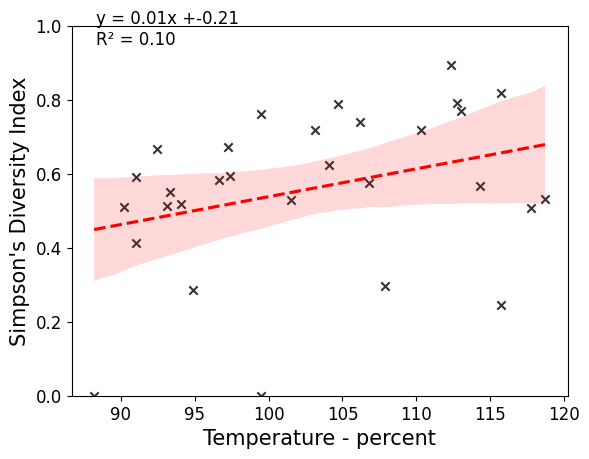

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
# Calculate the regression line and R-squared
slope, intercept = np.polyfit(data.Temperature_percent, data.diversity_index, 1)
fit_line = slope * data.Temperature_percent + intercept
r_squared = np.corrcoef(data.Temperature_percent, data.diversity_index)[0, 1]**2

# Add the regression line and R-squared to the plot
sns.regplot(x=data.Temperature_percent, y=data.diversity_index, marker='x', color='black', line_kws={'color':'red', 'ls':'--'})
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.xlabel('Temperature - percent', size=15)
plt.xticks(size=12)
plt.yticks(size=12)
plt.ylabel("Simpson's Diversity Index", size=15)
plt.ylim(0, 1)

# Add the equation of the line and R-squared to the plot
equation = f'y = {slope:.2f}x +{intercept:.2f}'
plt.text(0.05, 0.95, f'{equation}\nR² = {r_squared:.2f}', transform=plt.gca().transAxes, fontsize=12)

plt.show()

In [5]:
from scipy.stats import spearmanr

diversity = data['diversity_index']
temp = data['Temperature_percent']

# Calculate Spearman's rank correlation
correlation, p_value = spearmanr(diversity, temp)

print(f"Spearman's rank correlation: {correlation:.3f}")
print(f"P-value: {p_value:.3f}")


Spearman's rank correlation: 0.328
P-value: 0.077


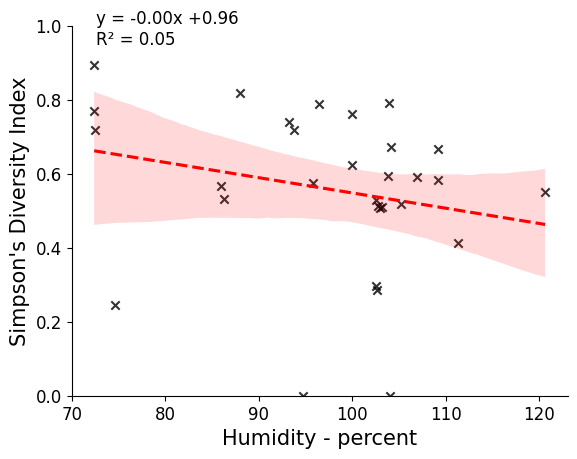

In [6]:
# Calculate the regression line and R-squared
slope, intercept = np.polyfit(data.Humidity_percent, data.diversity_index, 1)
fit_line = slope * data.Humidity_percent + intercept
r_squared = np.corrcoef(data.Humidity_percent, data.diversity_index)[0, 1]**2

# Add the regression line and R-squared to the plot
sns.regplot(x=data.Humidity_percent, y=data.diversity_index, marker='x', color='black', line_kws={'color':'red', 'ls':'--'})
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.xlabel('Humidity - percent', size=15)
plt.xticks(size=12)
plt.yticks(size=12)
plt.ylabel("Simpson's Diversity Index", size=15)
plt.ylim(0, 1)

# Add the equation of the line and R-squared to the plot
equation = f'y = {slope:.2f}x +{intercept:.2f}'
plt.text(0.05, 0.95, f'{equation}\nR² = {r_squared:.2f}', transform=plt.gca().transAxes, fontsize=12)

plt.show()

In [7]:
from scipy.stats import spearmanr

diversity = data['diversity_index']
humidity = data['Humidity_percent']

# Calculate Spearman's rank correlation
correlation, p_value = spearmanr(diversity, humidity)

print(f"Spearman's rank correlation: {correlation:.3f}")
print(f"P-value: {p_value:.3f}")

Spearman's rank correlation: -0.290
P-value: 0.120


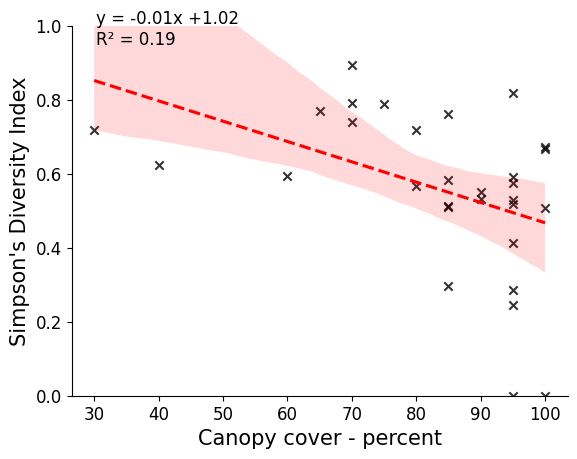

In [8]:
# Calculate the regression line and R-squared
slope, intercept = np.polyfit(data.Canopy_cover_percent, data.diversity_index, 1)
fit_line = slope * data.Canopy_cover_percent + intercept
r_squared = np.corrcoef(data.Canopy_cover_percent, data.diversity_index)[0, 1]**2

# Add the regression line and R-squared to the plot
sns.regplot(x=data.Canopy_cover_percent, y=data.diversity_index, marker='x', color='black', line_kws={'color':'red', 'ls':'--'})
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.xlabel('Canopy cover - percent', size=15)
plt.xticks(size=12)
plt.yticks(size=12)
plt.ylabel("Simpson's Diversity Index", size=15)
plt.ylim(0, 1)

# Add the equation of the line and R-squared to the plot
equation = f'y = {slope:.2f}x +{intercept:.2f}'
plt.text(0.05, 0.95, f'{equation}\nR² = {r_squared:.2f}', transform=plt.gca().transAxes, fontsize=12)

plt.show()

In [9]:
from scipy.stats import spearmanr

diversity = data['diversity_index']
canopy = data['Canopy_cover_percent']

# Calculate Spearman's rank correlation
correlation, p_value = spearmanr(diversity, canopy)

print(f"Spearman's rank correlation: {correlation:.3f}")
print(f"P-value: {p_value:.3f}")

Spearman's rank correlation: -0.530
P-value: 0.003


In [10]:
#degrees of freedom for spearman's rank test

n = len(data)  # Number of data points
degrees_of_freedom = n - 2
print(f"Degrees of freedom for Spearman's rank correlation test: {degrees_of_freedom}")


Degrees of freedom for Spearman's rank correlation test: 28


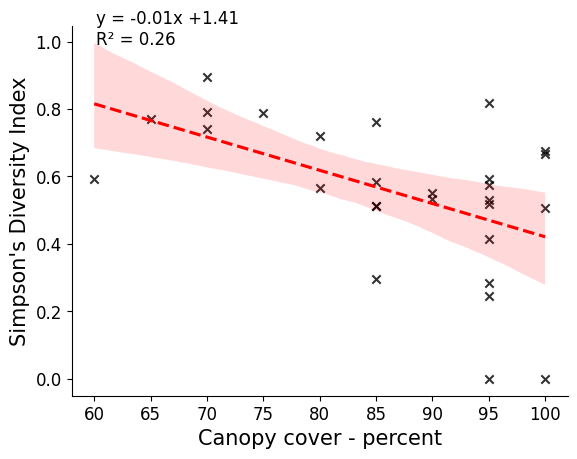

In [11]:
#removing anomalies
no_canopy_anomalies = data[data['Canopy_cover_percent'] > 50]
# Calculate the regression line and R-squared
slope, intercept = np.polyfit(no_canopy_anomalies.Canopy_cover_percent, no_canopy_anomalies.diversity_index, 1)
fit_line = slope * no_canopy_anomalies.Canopy_cover_percent + intercept
r_squared = np.corrcoef(no_canopy_anomalies.Canopy_cover_percent, no_canopy_anomalies.diversity_index)[0, 1]**2

# Add the regression line and R-squared to the plot
sns.regplot(x=no_canopy_anomalies.Canopy_cover_percent, y=no_canopy_anomalies.diversity_index, marker='x', color='black', line_kws={'color':'red', 'ls':'--'})
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.xlabel('Canopy cover - percent', size=15)
plt.xticks(size=12)
plt.yticks(size=12)
plt.ylabel("Simpson's Diversity Index", size=15)

# Add the equation of the line and R-squared to the plot
equation = f'y = {slope:.2f}x +{intercept:.2f}'
plt.text(0.05, 0.95, f'{equation}\nR² = {r_squared:.2f}', transform=plt.gca().transAxes, fontsize=12)

plt.show()

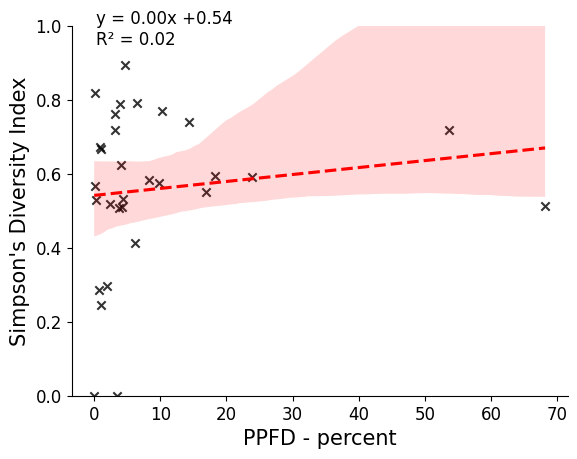

In [12]:
# Calculate the regression line and R-squared
slope, intercept = np.polyfit(data.PPFD_percent, data.diversity_index, 1)
fit_line = slope * data.PPFD_percent + intercept
r_squared = np.corrcoef(data.PPFD_percent, data.diversity_index)[0, 1]**2

# Add the regression line and R-squared to the plot
sns.regplot(x=data.PPFD_percent, y=data.diversity_index, marker='x', color='black', line_kws={'color':'red', 'ls':'--'})
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.xlabel('PPFD - percent', size=15)
plt.xticks(size=12)
plt.yticks(size=12)
plt.ylabel("Simpson's Diversity Index", size=15)
plt.ylim(0, 1)

# Add the equation of the line and R-squared to the plot
equation = f'y = {slope:.2f}x +{intercept:.2f}'
plt.text(0.05, 0.95, f'{equation}\nR² = {r_squared:.2f}', transform=plt.gca().transAxes, fontsize=12)

plt.show()

In [13]:
from scipy.stats import spearmanr

diversity = data['diversity_index']
ppfd = data['PPFD_percent']

# Calculate Spearman's rank correlation
correlation, p_value = spearmanr(diversity, ppfd)

print(f"Spearman's rank correlation: {correlation:.3f}")
print(f"P-value: {p_value:.3f}")

Spearman's rank correlation: 0.248
P-value: 0.187


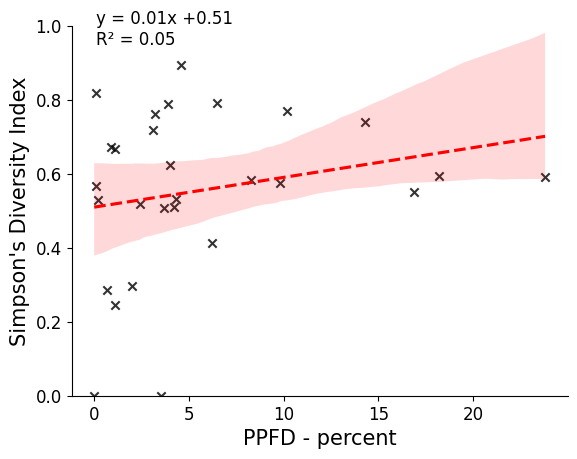

In [14]:
#removing anomalies
no_PPFD_anomalies = data[data['PPFD_percent'] < 50]
# Calculate the regression line and R-squared
slope, intercept = np.polyfit(no_PPFD_anomalies.PPFD_percent, no_PPFD_anomalies.diversity_index, 1)
fit_line = slope * no_PPFD_anomalies.PPFD_percent + intercept
r_squared = np.corrcoef(no_PPFD_anomalies.PPFD_percent, no_PPFD_anomalies.diversity_index)[0, 1]**2

# Add the regression line and R-squared to the plot
sns.regplot(x=no_PPFD_anomalies.PPFD_percent, y=no_PPFD_anomalies.diversity_index, marker='x', color='black', line_kws={'color':'red', 'ls':'--'})
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.xlabel('PPFD - percent', size=15)
plt.xticks(size=12)
plt.yticks(size=12)
plt.ylabel("Simpson's Diversity Index", size=15)
plt.ylim(0, 1)

# Add the equation of the line and R-squared to the plot
equation = f'y = {slope:.2f}x +{intercept:.2f}'
plt.text(0.05, 0.95, f'{equation}\nR² = {r_squared:.2f}', transform=plt.gca().transAxes, fontsize=12)

plt.show()

In [15]:
from scipy.stats import spearmanr

diversity = no_PPFD_anomalies['diversity_index']
ppfd = no_PPFD_anomalies['PPFD_percent']

# Calculate Spearman's rank correlation
correlation, p_value = spearmanr(diversity, ppfd)

print(f"Spearman's rank correlation: {correlation:.3f}")
print(f"P-value: {p_value:.3f}")

Spearman's rank correlation: 0.280
P-value: 0.149


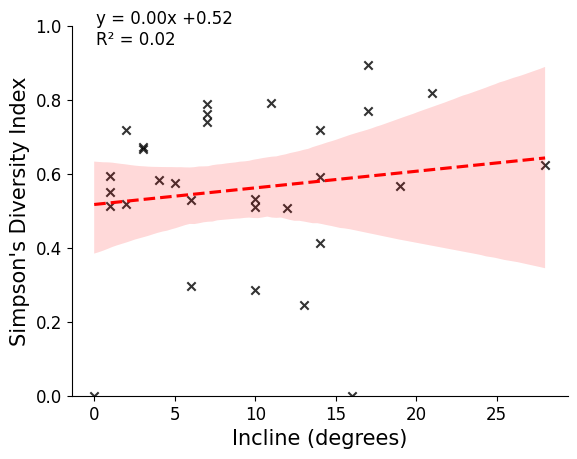

In [50]:
# Calculate the regression line and R-squared
slope, intercept = np.polyfit(data.Gradient, data.diversity_index, 1)
fit_line = slope * data.Gradient + intercept
r_squared = np.corrcoef(data.Gradient, data.diversity_index)[0, 1]**2

# Add the regression line and R-squared to the plot
sns.regplot(x=data.Gradient, y=data.diversity_index, marker='x', color='black', line_kws={'color':'red', 'ls':'--'})
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.xlabel('Incline (degrees)', size=15)
plt.xticks(size=12)
plt.yticks(size=12)
plt.ylabel("Simpson's Diversity Index", size=15)
plt.ylim(0, 1)

# Add the equation of the line and R-squared to the plot
equation = f'y = {slope:.2f}x +{intercept:.2f}'
plt.text(0.05, 0.95, f'{equation}\nR² = {r_squared:.2f}', transform=plt.gca().transAxes, fontsize=12)

plt.show()

In [17]:
from scipy.stats import spearmanr

diversity = data['diversity_index']
gradient = data['Gradient']

# Calculate Spearman's rank correlation
correlation, p_value = spearmanr(diversity, gradient)

print(f"Spearman's rank correlation: {correlation:.3f}")
print(f"P-value: {p_value:.3f}")

Spearman's rank correlation: 0.204
P-value: 0.281


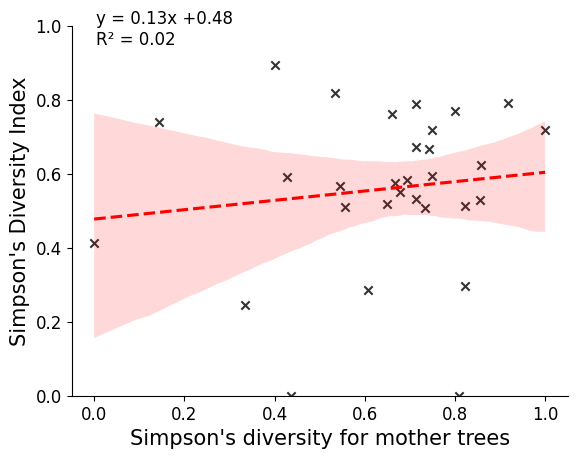

In [18]:
# Calculate the regression line and R-squared
slope, intercept = np.polyfit(data.Mother_diversity, data.diversity_index, 1)
fit_line = slope * data.Mother_diversity + intercept
r_squared = np.corrcoef(data.Mother_diversity, data.diversity_index)[0, 1]**2

# Add the regression line and R-squared to the plot
sns.regplot(x=data.Mother_diversity, y=data.diversity_index, marker='x', color='black', line_kws={'color':'red', 'ls':'--'})
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.xlabel("Simpson's diversity for mother trees", size=15)
plt.xticks(size=12)
plt.yticks(size=12)
plt.ylabel("Simpson's Diversity Index", size=15)
plt.ylim(0, 1)

# Add the equation of the line and R-squared to the plot
equation = f'y = {slope:.2f}x +{intercept:.2f}'
plt.text(0.05, 0.95, f'{equation}\nR² = {r_squared:.2f}', transform=plt.gca().transAxes, fontsize=12)

plt.show()

In [19]:
from scipy.stats import spearmanr

diversity = data['diversity_index']
mother = data['Mother_diversity']

# Calculate Spearman's rank correlation
correlation, p_value = spearmanr(diversity, mother)

print(f"Spearman's rank correlation: {correlation:.3f}")
print(f"P-value: {p_value:.3f}")

Spearman's rank correlation: 0.113
P-value: 0.551


# Alpha diversity PCA

[0.40381172 0.26238013]
The first two principal components explain 66.62% of the variation.


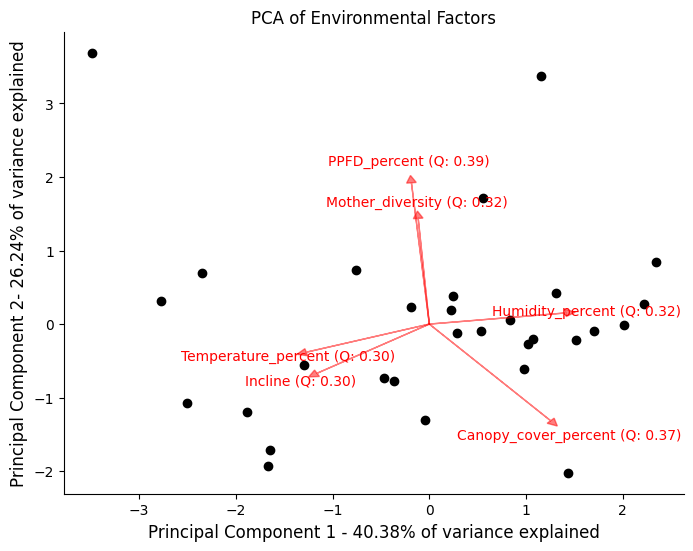

In [52]:
#pca

import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd

# Select the relevant columns for PCA
X = data[['Temperature_percent', 'Humidity_percent', 'Canopy_cover_percent',
          'PPFD_percent', 'Gradient', 'Mother_diversity']]

# Standardize the data
x = StandardScaler().fit_transform(X)

# Apply PCA
pca = PCA(n_components=2) #can change number of components
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data=principalComponents,
                           columns=['principal_component_1',
                                    'principal_component_2'])

# Add the diversity index to the PCA DataFrame
finalDf = pd.concat([principalDf, data['diversity_index']], axis=1)

# explained variance ratio to see how much each principal component explains the variance in the data
print(pca.explained_variance_ratio_)

#visualize the data in the new principal component space using a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(finalDf['principal_component_1'],
            finalDf['principal_component_2'], color='black')

# Add arrows for each factor and their quality of representation
for i, feature in enumerate(X.columns):
    # Calculate the quality of representation (squared loading)
    quality = pca.components_[0, i]**2 + pca.components_[1, i]**2

    arrow_length = quality * 8

    plt.arrow(0, 0, pca.components_[0, i] * arrow_length, pca.components_[1, i] * arrow_length,
              color='r', alpha=0.5, head_width=0.1, head_length=0.1)
    if feature == 'Gradient':
        plt.text(pca.components_[0, i] * arrow_length * 1.15, pca.components_[1, i] * arrow_length * 1.15,
                 f"Incline (Q: {quality:.2f})", # Changed label here
                 color='r', ha='center', va='center')
    else:
        plt.text(pca.components_[0, i] * arrow_length * 1.15, pca.components_[1, i] * arrow_length * 1.15,
             f"{feature} (Q: {quality:.2f})",
             color='r', ha='center', va='center')

explained_variance_ratio = pca.explained_variance_ratio_
proportion_explained = explained_variance_ratio[0] + explained_variance_ratio[1]
x_axis_explain_percent = round(explained_variance_ratio[0] * 100, 2)
y_axis_explain_percent = round(explained_variance_ratio[1] * 100, 2)

print(f"The first two principal components explain {proportion_explained:.2%} of the variation.")
plt.xlabel(f'Principal Component 1 - {x_axis_explain_percent}% of variance explained', size=12)
plt.ylabel(f'Principal Component 2- {y_axis_explain_percent}% of variance explained',size=12)
plt.title('PCA of Environmental Factors')
plt.show()


In [22]:
#bse using principal components
import statsmodels.formula.api as sm
import pandas as pd


def backward_elimination(data, target, significance_level=0.05):
  """
  Performs backward stepwise elimination on a DataFrame to find the minimum model.

  Args:
      data: Pandas DataFrame containing the data.
      target: Name of the target variable.
      significance_level: Significance level for removing variables.

  Returns:
      A list of the variables in the minimum model.
  """
  variables = list(data.columns)
  variables.remove(target)
  while True:
    model = sm.ols(f"{target} ~ {' + '.join(variables)}", data=data).fit()
    p_values = model.pvalues.drop('Intercept')
    max_p_value = p_values.max()
    if max_p_value > significance_level:
      variable_to_remove = p_values.idxmax()
      variables.remove(variable_to_remove)
    else:
      break
  return variables

# Perform backward elimination
selected_variables = backward_elimination(finalDf, 'diversity_index')

print("Selected variables for minimum model:")
selected_variables


Selected variables for minimum model:


['principal_component_1']

In [23]:
import statsmodels.formula.api as sm
import pandas as pd
# Fit the model with canopy cover as the predictor
model = sm.ols('diversity_index ~ principal_component_1', data=finalDf).fit()

# Extract the F-statistic, degrees of freedom, and p-value
f_statistic = model.fvalue
df_model = model.df_model
df_resid = model.df_resid
p_value = model.f_pvalue

print(f"F-statistic: {f_statistic}")
print(f"Degrees of freedom (model): {df_model}")
print(f"Degrees of freedom (residual): {df_resid}")
print(f"P-value: {p_value}")


F-statistic: 4.224036581401049
Degrees of freedom (model): 1.0
Degrees of freedom (residual): 28.0
P-value: 0.04929044884749115


# Beta diversity plots

In [24]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
beta_data = pd.read_csv('/content/drive/MyDrive/Ecology/Beta diversity data.csv')
beta_data

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Site,beta_canopy,beta_gradient,beta_temp,beta_humidity,beta_mother,temperature,humidity,canopy,gradient,simpsons,mother_simp
0,1,0.979167,0.915493,0.441860,0.979167,0.485,106.779661,95.840868,95,5,0.575560,0.67
1,2,0.230769,0.905882,0.916667,0.230769,0.737,106.179775,93.272727,70,7,0.741077,0.14
2,3,0.000000,1.000000,1.000000,0.000000,0.687,107.853403,102.500000,85,6,0.296667,0.82
3,4,1.000000,1.000000,1.000000,1.000000,1.000,101.546392,102.549020,95,6,0.529412,0.85
4,5,1.000000,0.786164,0.958904,1.000000,1.000,97.409326,103.846154,60,1,0.593804,0.75
5,6,0.944444,0.756098,0.623188,0.944444,0.946,92.424242,109.161793,100,3,0.666667,0.74
6,7,1.000000,0.650000,0.798319,1.000000,0.963,99.500000,100.000000,85,7,0.761016,0.66
7,8,1.000000,0.000000,0.910448,1.000000,0.980,94.059406,105.263158,95,2,0.517647,0.65
8,9,0.840000,1.000000,0.879518,0.984962,0.981,112.745098,103.898635,70,11,0.791987,0.92
9,10,0.984962,0.877095,1.000000,1.000000,1.000,94.871795,102.626642,95,10,0.285714,0.61


Text(0, 0.5, 'Beta diversity')

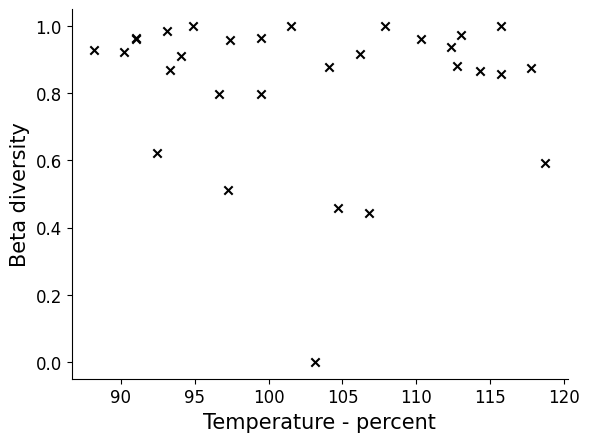

In [25]:
import matplotlib.pyplot as plt
plt.scatter(beta_data.temperature, beta_data.beta_temp, marker='x', color='black')
plt.xlabel('Temperature - percent', size=15)
plt.xticks(size=12)
plt.yticks(size=12)
plt.ylabel("Beta diversity", size=15)

Text(0, 0.5, 'Beta diversity')

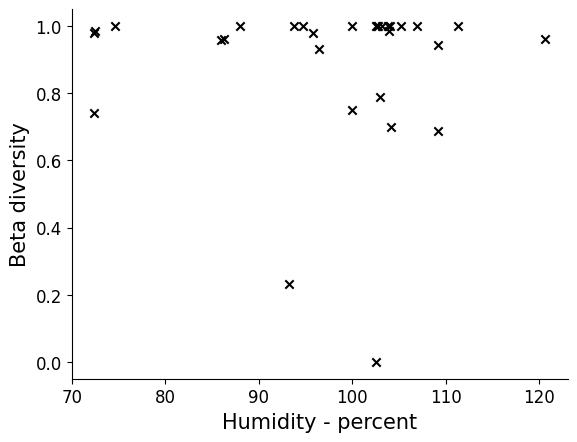

In [26]:
plt.scatter(beta_data.humidity, beta_data.beta_humidity, marker='x', color='black')
plt.xlabel('Humidity - percent', size=15)
plt.xticks(size=12)
plt.yticks(size=12)
plt.ylabel("Beta diversity", size=15)

Text(0, 0.5, 'Beta diversity')

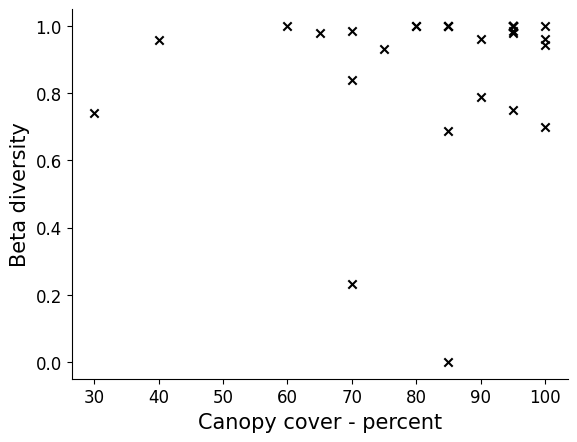

In [27]:
plt.scatter(beta_data.canopy, beta_data.beta_canopy, marker='x', color='black')
plt.xlabel('Canopy cover - percent', size=15)
plt.xticks(size=12)
plt.yticks(size=12)
plt.ylabel("Beta diversity", size=15)

Text(0, 0.5, 'Beta diversity')

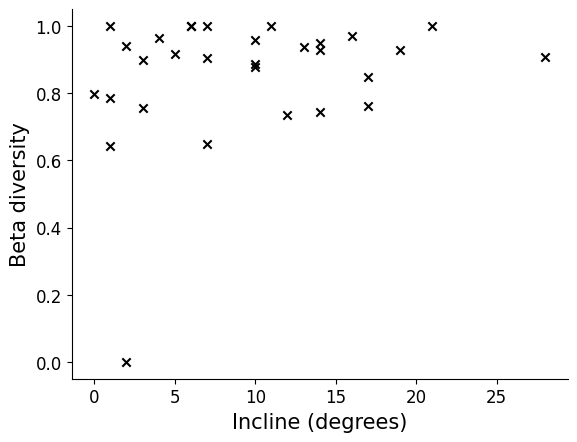

In [53]:
plt.scatter(beta_data.gradient, beta_data.beta_gradient, marker='x', color='black')
plt.xlabel('Incline (degrees)', size=15)
plt.xticks(size=12)
plt.yticks(size=12)
plt.ylabel("Beta diversity", size=15)

Text(0, 0.5, 'Beta diversity')

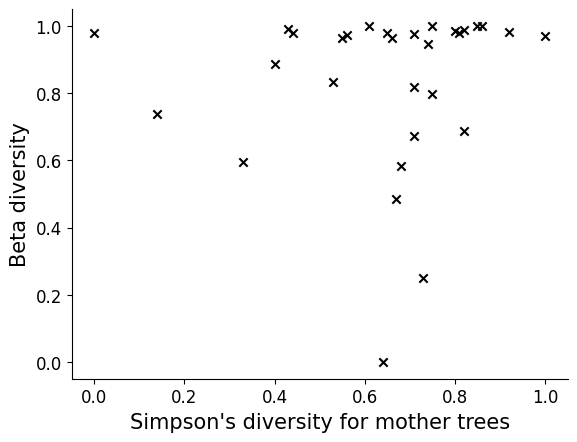

In [29]:
plt.scatter(beta_data.mother_simp, beta_data.beta_mother, marker='x', color='black')
plt.xlabel("Simpson's diversity for mother trees", size=15)
plt.xticks(size=12)
plt.yticks(size=12)
plt.ylabel("Beta diversity", size=15)

#Beta expected trend

In [30]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
beta_expected = pd.read_csv('/content/drive/MyDrive/Ecology/Beta expected trend.csv')
beta_expected

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Microclimate_variable,Beta_diversity
0,0,1.0
1,1,0.8
2,2,0.6
3,3,0.4
4,4,0.2
5,5,0.0
6,6,0.2
7,7,0.4
8,8,0.6
9,9,0.8


Text(0, 0.5, 'Beta diversity')

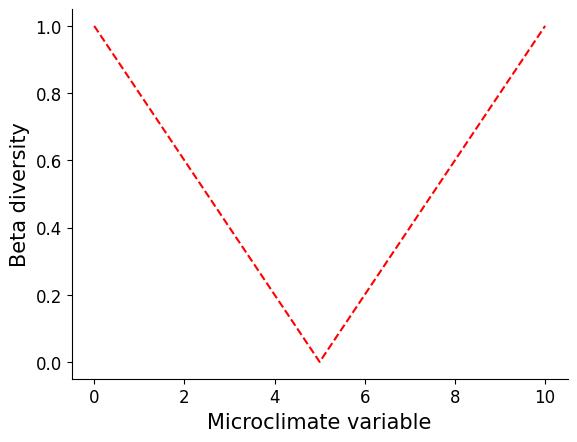

In [31]:
plt.plot(beta_expected.Microclimate_variable, beta_expected.Beta_diversity, color='red', ls='--')
plt.xlabel("Microclimate variable", size=15)
plt.xticks(size=12)
plt.yticks(size=12)
plt.ylabel("Beta diversity", size=15)

# Mother tree plots

In [32]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
mother_data = pd.read_csv('/content/drive/MyDrive/Ecology/Mother tree data.csv')
mother_data

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Site,sap_no,sap_percentage,canopy_cover,mother_no,mother_simp
0,1,0,0.00,95,9,0.67
1,2,22,0.38,70,7,0.14
2,3,22,0.88,85,9,0.82
3,4,0,0.00,95,11,0.85
4,5,0,0.00,60,9,0.75
5,6,13,0.59,100,13,0.74
6,7,6,0.05,85,14,0.66
7,8,0,0.00,95,14,0.65
8,9,0,0.00,70,9,0.92
9,10,0,0.00,95,8,0.61


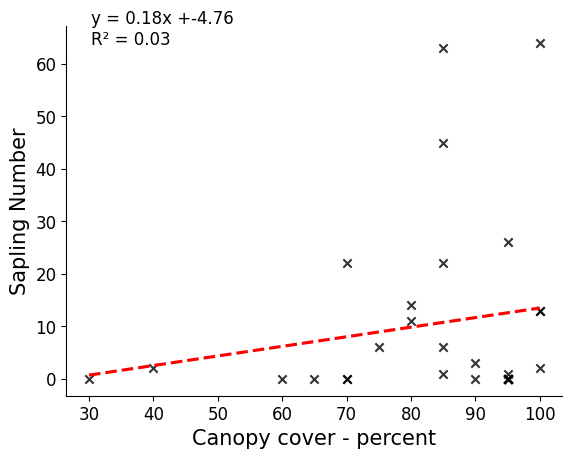

In [33]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
# Calculate the regression line and R-squared
slope, intercept = np.polyfit(mother_data.canopy_cover, mother_data.sap_no, 1)
fit_line = slope * mother_data.canopy_cover + intercept
r_squared = np.corrcoef(mother_data.canopy_cover, mother_data.sap_no)[0, 1]**2

# Add the regression line and R-squared to the plot
sns.regplot(x=mother_data.canopy_cover, y=mother_data.sap_no, ci=False, marker='x', color='black', line_kws={'color':'red', 'ls':'--'})
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.xlabel('Canopy cover - percent', size=15)
plt.xticks(size=12)
plt.yticks(size=12)
plt.ylabel("Sapling Number", size=15)

# Add the equation of the line and R-squared to the plot
equation = f'y = {slope:.2f}x +{intercept:.2f}'
plt.text(0.05, 0.95, f'{equation}\nR² = {r_squared:.2f}', transform=plt.gca().transAxes, fontsize=12)

plt.show()

In [34]:
from scipy.stats import spearmanr

sap_no = mother_data['sap_no']
canopy_cover = mother_data['canopy_cover']

# Calculate Spearman's rank correlation
correlation, p_value = spearmanr(sap_no, canopy_cover)

print(f"Spearman's rank correlation: {correlation:.3f}")
print(f"P-value: {p_value:.3f}")


Spearman's rank correlation: 0.108
P-value: 0.571


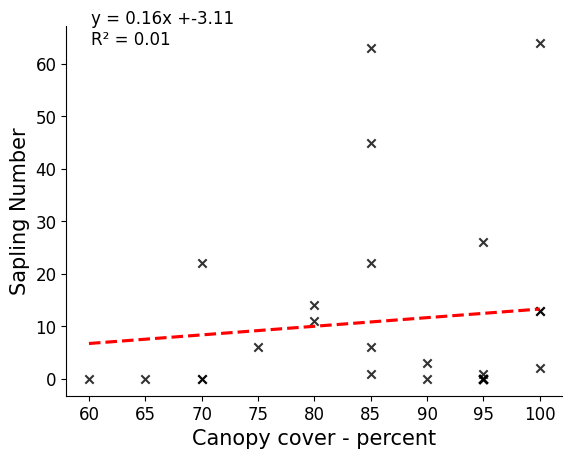

In [35]:
#remove anomalies
no_canopy_sap_no_anomalies = mother_data[mother_data['canopy_cover'] > 50]
# Calculate the regression line and R-squared
slope, intercept = np.polyfit(no_canopy_sap_no_anomalies.canopy_cover, no_canopy_sap_no_anomalies.sap_no, 1)
fit_line = slope * no_canopy_sap_no_anomalies.canopy_cover + intercept
r_squared = np.corrcoef(no_canopy_sap_no_anomalies.canopy_cover, no_canopy_sap_no_anomalies.sap_no)[0, 1]**2

# Add the regression line and R-squared to the plot
sns.regplot(x=no_canopy_sap_no_anomalies.canopy_cover, y=no_canopy_sap_no_anomalies.sap_no, ci=False, marker='x', color='black', line_kws={'color':'red', 'ls':'--'})
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.xlabel('Canopy cover - percent', size=15)
plt.xticks(size=12)
plt.yticks(size=12)
plt.ylabel("Sapling Number", size=15)

# Add the equation of the line and R-squared to the plot
equation = f'y = {slope:.2f}x +{intercept:.2f}'
plt.text(0.05, 0.95, f'{equation}\nR² = {r_squared:.2f}', transform=plt.gca().transAxes, fontsize=12)

plt.show()


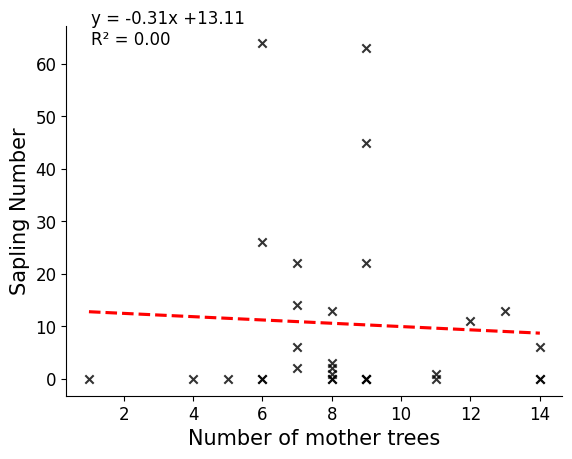

In [36]:
# Calculate the regression line and R-squared
slope, intercept = np.polyfit(mother_data.mother_no, mother_data.sap_no, 1)
fit_line = slope * mother_data.mother_no + intercept
r_squared = np.corrcoef(mother_data.mother_no, mother_data.sap_no)[0, 1]**2

# Add the regression line and R-squared to the plot
sns.regplot(x=mother_data.mother_no, y=mother_data.sap_no, ci=False, marker='x', color='black', line_kws={'color':'red', 'ls':'--'})
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.xlabel('Number of mother trees', size=15)
plt.xticks(size=12)
plt.yticks(size=12)
plt.ylabel("Sapling Number", size=15)

# Add the equation of the line and R-squared to the plot
equation = f'y = {slope:.2f}x +{intercept:.2f}'
plt.text(0.05, 0.95, f'{equation}\nR² = {r_squared:.2f}', transform=plt.gca().transAxes, fontsize=12)

plt.show()

In [37]:
n = len(mother_data)  # Number of data points
degrees_of_freedom = n - 2
print(f"Degrees of freedom for Spearman's rank correlation test: {degrees_of_freedom}")

Degrees of freedom for Spearman's rank correlation test: 28


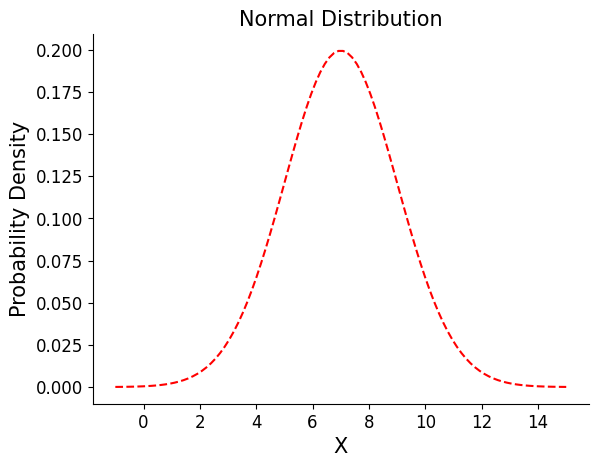

In [38]:
#plot of normal distribution line with mean = 7, sd = 2

import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

# Mean of the normal distribution
mean = 7

# Standard deviation
std_dev = 2

# Generate x values for the plot
x = np.linspace(mean - 4 * std_dev, mean + 4 * std_dev, 100)

# Calculate the probability density function of the normal distribution
y = norm.pdf(x, mean, std_dev)

# plot
plt.plot(x, y, 'r--')  # Red dashed line


plt.xlabel('X', size=15)
plt.ylabel('Probability Density', size=15)
plt.xticks(size=12)
plt.yticks(size=12)
plt.title('Normal Distribution', size=15)
plt.show()


In [39]:
from scipy.stats import spearmanr

sap_no = mother_data['sap_no']
mother_no = mother_data['mother_no']

# Calculate Spearman's rank correlation
correlation, p_value = spearmanr(sap_no, mother_no)

print(f"Spearman's rank correlation: {correlation:.3f}")
print(f"P-value: {p_value:.3f}")


Spearman's rank correlation: 0.024
P-value: 0.901


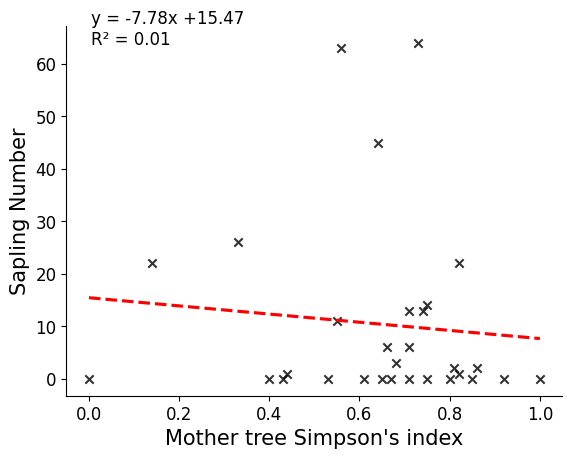

In [40]:
# Calculate the regression line and R-squared
slope, intercept = np.polyfit(mother_data.mother_simp, mother_data.sap_no, 1)
fit_line = slope * mother_data.mother_simp + intercept
r_squared = np.corrcoef(mother_data.mother_simp, mother_data.sap_no)[0, 1]**2

# Add the regression line and R-squared to the plot
sns.regplot(x=mother_data.mother_simp, y=mother_data.sap_no, ci=False, marker='x', color='black', line_kws={'color':'red', 'ls':'--'})
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.xlabel("Mother tree Simpson's index", size=15)
plt.xticks(size=12)
plt.yticks(size=12)
plt.ylabel("Sapling Number", size=15)

# Add the equation of the line and R-squared to the plot
equation = f'y = {slope:.2f}x +{intercept:.2f}'
plt.text(0.05, 0.95, f'{equation}\nR² = {r_squared:.2f}', transform=plt.gca().transAxes, fontsize=12)

plt.show()

In [41]:
from scipy.stats import spearmanr

sap_no = mother_data['sap_no']
mother_simp = mother_data['mother_simp']

# Calculate Spearman's rank correlation
correlation, p_value = spearmanr(sap_no, mother_simp)

print(f"Spearman's rank correlation: {correlation:.3f}")
print(f"P-value: {p_value:.3f}")


Spearman's rank correlation: -0.091
P-value: 0.631


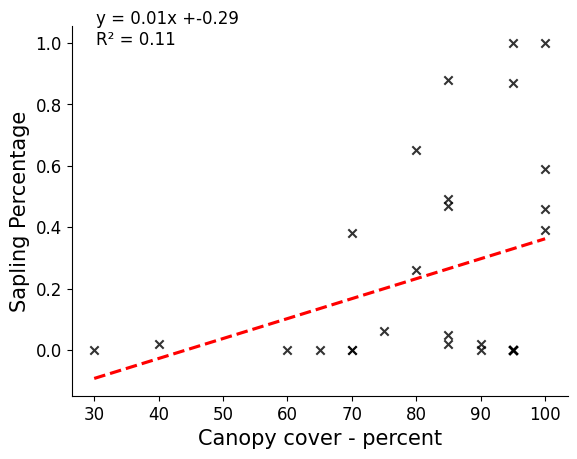

In [42]:
# Calculate the regression line and R-squared
slope, intercept = np.polyfit(mother_data.canopy_cover, mother_data.sap_percentage, 1)
fit_line = slope * mother_data.canopy_cover + intercept
r_squared = np.corrcoef(mother_data.canopy_cover, mother_data.sap_percentage)[0, 1]**2

# Add the regression line and R-squared to the plot
sns.regplot(x=mother_data.canopy_cover, y=mother_data.sap_percentage, ci=False, marker='x', color='black', line_kws={'color':'red', 'ls':'--'})
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.xlabel("Canopy cover - percent", size=15)
plt.xticks(size=12)
plt.yticks(size=12)
plt.ylabel("Sapling Percentage", size=15)

# Add the equation of the line and R-squared to the plot
equation = f'y = {slope:.2f}x +{intercept:.2f}'
plt.text(0.05, 0.95, f'{equation}\nR² = {r_squared:.2f}', transform=plt.gca().transAxes, fontsize=12)

plt.show()

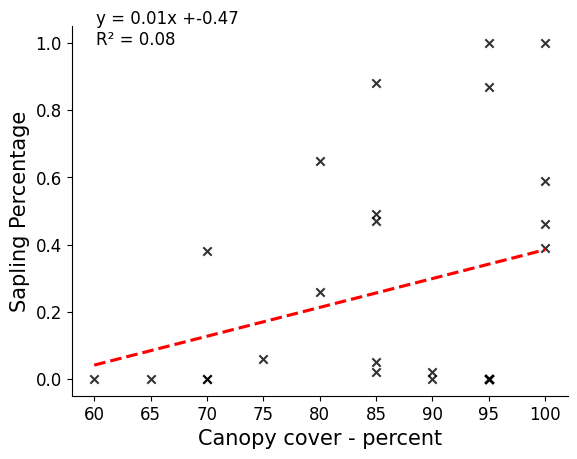

In [43]:
#remove anomalies
no_canopy_sap_percent_anomalies = mother_data[mother_data['canopy_cover'] > 50]
# Calculate the regression line and R-squared
slope, intercept = np.polyfit(no_canopy_sap_percent_anomalies.canopy_cover, no_canopy_sap_percent_anomalies.sap_percentage, 1)
fit_line = slope * no_canopy_sap_percent_anomalies.canopy_cover + intercept
r_squared = np.corrcoef(no_canopy_sap_percent_anomalies.canopy_cover, no_canopy_sap_percent_anomalies.sap_percentage)[0, 1]**2

# Add the regression line and R-squared to the plot
sns.regplot(x=no_canopy_sap_percent_anomalies.canopy_cover, y=no_canopy_sap_percent_anomalies.sap_percentage, ci=False, marker='x', color='black', line_kws={'color':'red', 'ls':'--'})
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.xlabel("Canopy cover - percent", size=15)
plt.xticks(size=12)
plt.yticks(size=12)
plt.ylabel("Sapling Percentage", size=15)

# Add the equation of the line and R-squared to the plot
equation = f'y = {slope:.2f}x +{intercept:.2f}'
plt.text(0.05, 0.95, f'{equation}\nR² = {r_squared:.2f}', transform=plt.gca().transAxes, fontsize=12)

plt.show()

In [44]:
from scipy.stats import spearmanr


sap_percent = mother_data['sap_percentage']
canopy_cover = mother_data['canopy_cover']

# Calculate Spearman's rank correlation
correlation, p_value = spearmanr(sap_percent, canopy_cover)

print(f"Spearman's rank correlation: {correlation:.3f}")
print(f"P-value: {p_value:.3f}")

Spearman's rank correlation: 0.240
P-value: 0.201


In [45]:

sap_percent = no_canopy_sap_percent_anomalies['sap_percentage']
canopy_cover = no_canopy_sap_percent_anomalies['canopy_cover']

# Calculate Spearman's rank correlation
correlation, p_value = spearmanr(sap_percent, canopy_cover)

print(f"Spearman's rank correlation: {correlation:.3f}")
print(f"P-value: {p_value:.3f}")

Spearman's rank correlation: 0.206
P-value: 0.292


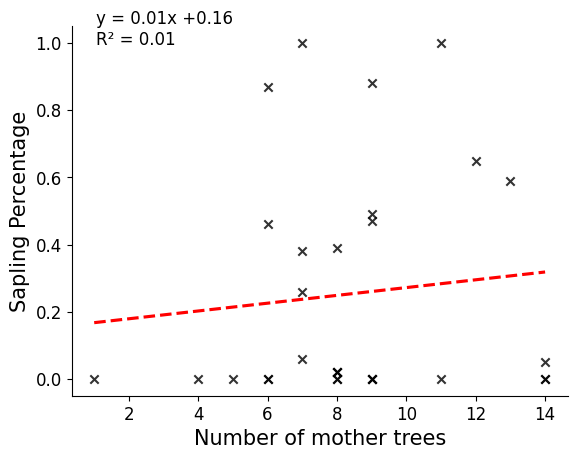

In [46]:
# Calculate the regression line and R-squared
slope, intercept = np.polyfit(mother_data.mother_no, mother_data.sap_percentage, 1)
fit_line = slope * mother_data.mother_no + intercept
r_squared = np.corrcoef(mother_data.mother_no, mother_data.sap_percentage)[0, 1]**2

# Add the regression line and R-squared to the plot
sns.regplot(x=mother_data.mother_no, y=mother_data.sap_percentage, ci=False, marker='x', color='black', line_kws={'color':'red', 'ls':'--'})
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.xlabel("Number of mother trees", size=15)
plt.xticks(size=12)
plt.yticks(size=12)
plt.ylabel("Sapling Percentage", size=15)

# Add the equation of the line and R-squared to the plot
equation = f'y = {slope:.2f}x +{intercept:.2f}'
plt.text(0.05, 0.95, f'{equation}\nR² = {r_squared:.2f}', transform=plt.gca().transAxes, fontsize=12)

plt.show()

In [47]:
from scipy.stats import spearmanr

sap_percent = mother_data['sap_percentage']
mother_no = mother_data['mother_no']

# Calculate Spearman's rank correlation
correlation, p_value = spearmanr(sap_percent, mother_no)

print(f"Spearman's rank correlation: {correlation:.3f}")
print(f"P-value: {p_value:.3f}")

Spearman's rank correlation: 0.129
P-value: 0.497


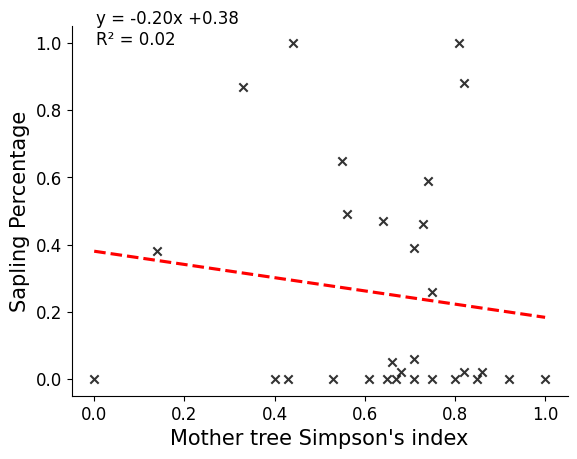

In [48]:
# Calculate the regression line and R-squared
slope, intercept = np.polyfit(mother_data.mother_simp, mother_data.sap_percentage, 1)
fit_line = slope * mother_data.mother_simp + intercept
r_squared = np.corrcoef(mother_data.mother_simp, mother_data.sap_percentage)[0, 1]**2

# Add the regression line and R-squared to the plot
sns.regplot(x=mother_data.mother_simp, y=mother_data.sap_percentage, ci=False, marker='x', color='black', line_kws={'color':'red', 'ls':'--'})
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.xlabel("Mother tree Simpson's index", size=15)
plt.xticks(size=12)
plt.yticks(size=12)
plt.ylabel("Sapling Percentage", size=15)

# Add the equation of the line and R-squared to the plot
equation = f'y = {slope:.2f}x +{intercept:.2f}'
plt.text(0.05, 0.95, f'{equation}\nR² = {r_squared:.2f}', transform=plt.gca().transAxes, fontsize=12)

plt.show()

In [49]:
from scipy.stats import spearmanr

sap_percent = mother_data['sap_percentage']
mother_simp = mother_data['mother_simp']

# Calculate Spearman's rank correlation
correlation, p_value = spearmanr(sap_percent, mother_simp)

print(f"Spearman's rank correlation: {correlation:.3f}")
print(f"P-value: {p_value:.3f}")


Spearman's rank correlation: -0.079
P-value: 0.680
